In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import math

### Be Group Entrance DS Test
**Candidate**: Dương Nam Hải

In [2]:
uber = pd.read_csv('../input/uber-fares-dataset/uber.csv', index_col=0)
uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 24238194 to 11951496
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


There is 1 row that has missing `dropoff_longitude` and `dropoff_latitude`. This is not many so to make it simple, we will remove it from the dataset.

In [3]:
df = uber.dropna()

# Check the 5-number summary for numeric columns

In [4]:
nume_cols = df.select_dtypes(exclude=object).columns

df[nume_cols].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


We can observe some outliers through the summary, let's try boxploting them to omit these outliers.

# Boxplot for every numeric column

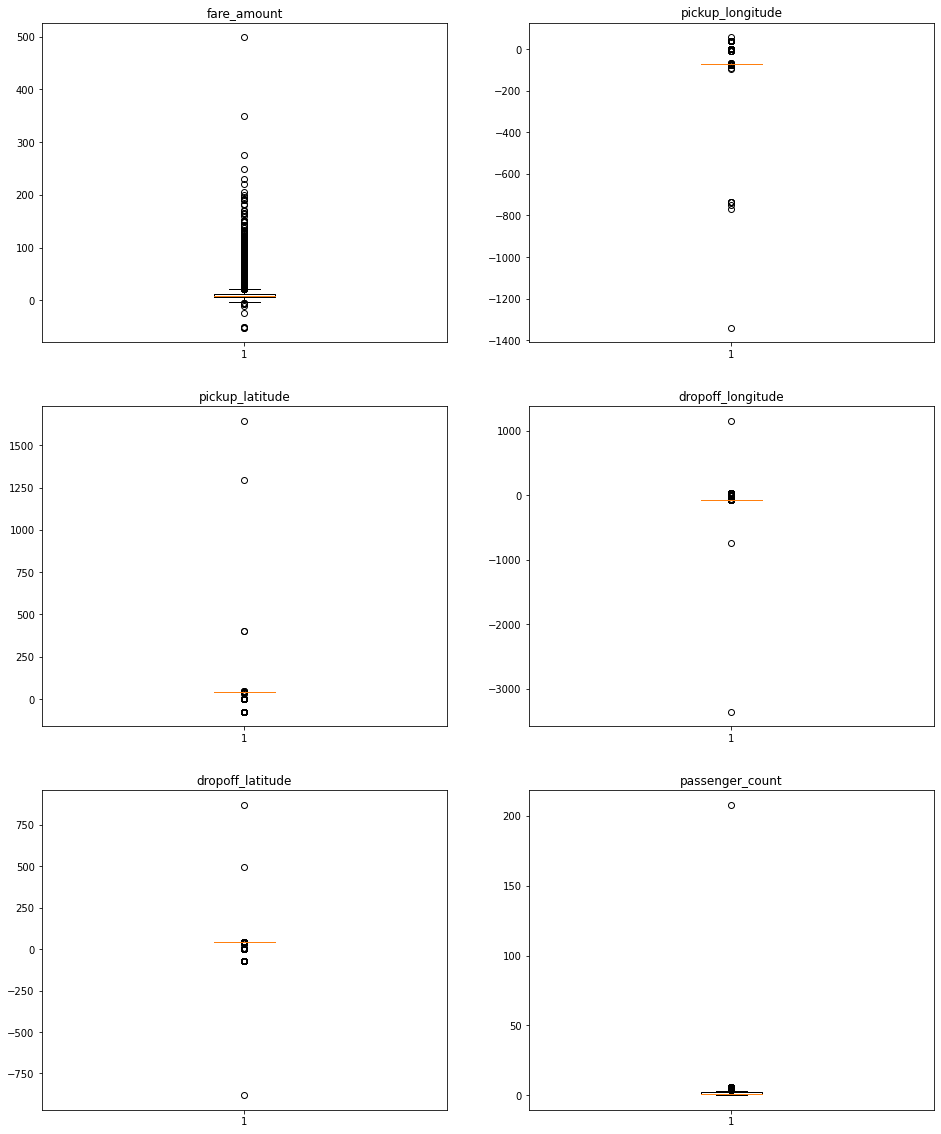

In [5]:
fig, ax = plt.subplots(3, 2, figsize=(16,20))

for i in range(6):
    data = df[nume_cols[i]]
    data = data[~data.isna()]
    ax[math.floor(i / 2), i % 2].boxplot(data)
    ax[math.floor(i / 2), i % 2].set_title(f'{nume_cols[i]}')

According to Mapbox,

**"Latitude and longitude are a pair of numbers (coordinates) used to describe a position on the plane of a geographic coordinate system. The numbers are in decimal degrees format and range from -90 to 90 for latitude and -180 to 180 for longitude."**

We will consider the data points out of these scopes are outliers.

The abnormal 200 passengers should also be dropped out.

For the fares, we should omit the negative data points.

In [6]:
df = df[
    (-180 < df['pickup_longitude']) & (df['pickup_longitude'] < 180) &
    (-180 < df['dropoff_longitude']) & (df['dropoff_longitude'] < 180) &
    (-90 < df['pickup_latitude']) & (df['pickup_latitude'] < 90) &
    (-90 < df['dropoff_latitude']) & (df['dropoff_latitude'] < 90) &
    (df['passenger_count'] < 50) & (df['passenger_count'] > 0) &
    (df['fare_amount'] > 0)
]
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


# Haversine formula to calculate distance

In [7]:
#Credit to Kaggle user ADNAN BURHANPURWALA 
def haversine(lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

df['Distance'] = haversine(df['pickup_longitude'], df['dropoff_longitude'],
                            df['pickup_latitude'], df['dropoff_latitude'])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


# Check distance abnormal

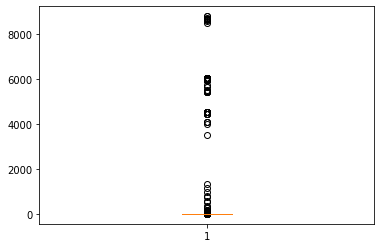

In [8]:
plt.boxplot(df['Distance']);

There are many trips with >2000km distance, let's omit them out.

In [9]:
df = df[(df['Distance'] < 2000) & df['Distance'] > 0]

# Scatterplot of `Distance` vs `fare_amount`

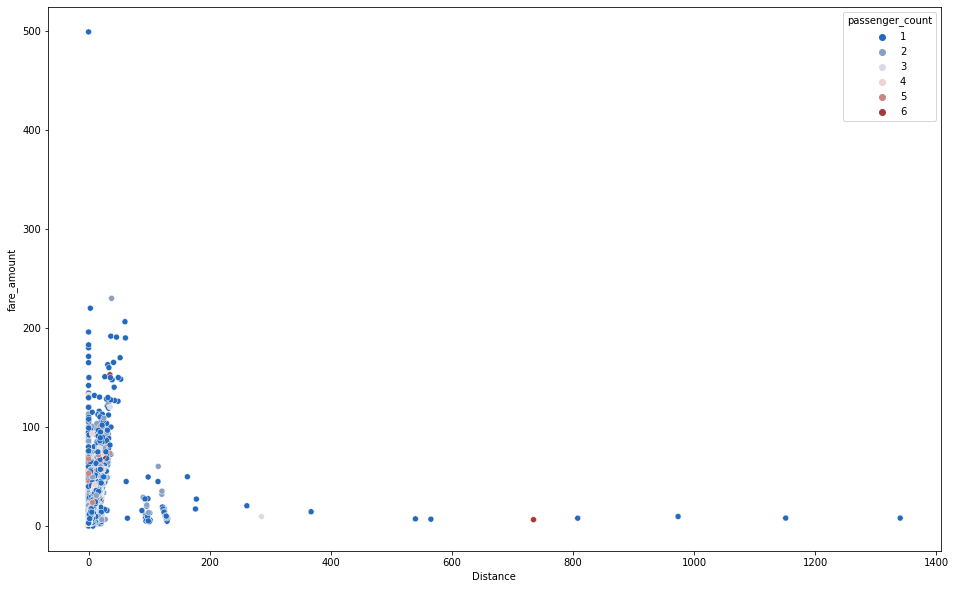

In [10]:
plt.subplots(figsize=(16,10))
sns.scatterplot(data=df, x='Distance', y='fare_amount', hue='passenger_count',palette='vlag');

Serveral non-plausible issues can be observed:
- Over 200km trips (with very low fee)
- Over $200 fee but (but very short trip)

These abnormal trips should be omitted.

In [11]:
df = df[
    (df['Distance'] < 200) &
    (df['fare_amount'] < 200)
]
df.shape

(193217, 9)

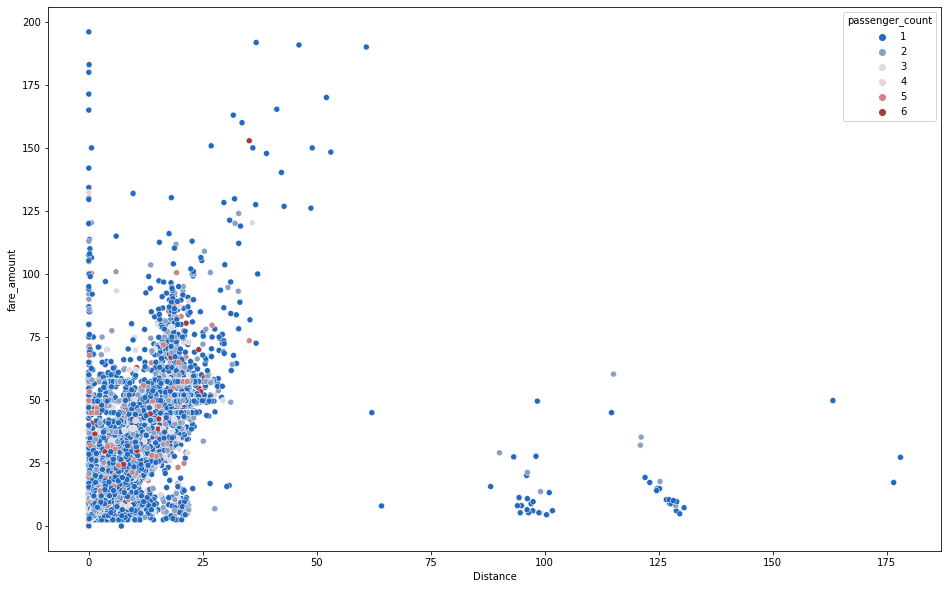

In [12]:
plt.subplots(figsize=(16,10))
sns.scatterplot(data=df, x='Distance', y='fare_amount', hue='passenger_count', palette='vlag');

We can still observe some trips with distance close to 0 but have really high cost and those with very long distance but low fare.

Let's put more threshold to omit out more of these trips.

In [13]:
df = df.drop(
    df[(df['fare_amount'] > 75) & (df['Distance'] < 5)].index
)
df = df.drop(
    df[(df['fare_amount'] < 75) & (df['Distance'] > 40)].index
)
df.shape

(193124, 9)

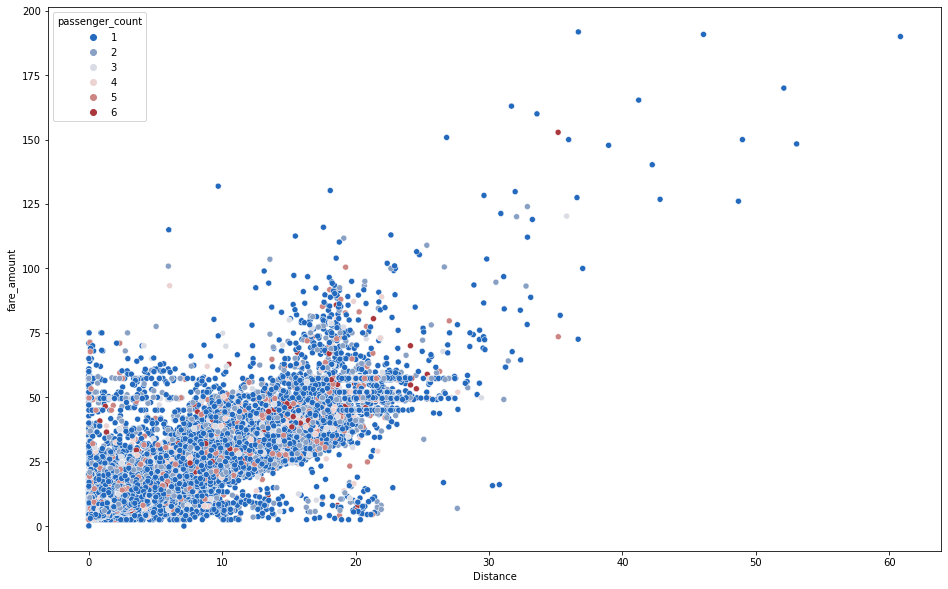

In [14]:
plt.subplots(figsize=(16,10))
sns.scatterplot(data=df, x='Distance', y='fare_amount', hue='passenger_count',palette='vlag');

By omitting the abnormal trips, the scatterplot now shows high positive correlation between `Distance` and `fare_amount`

# Correlation Matrix

<AxesSubplot:>

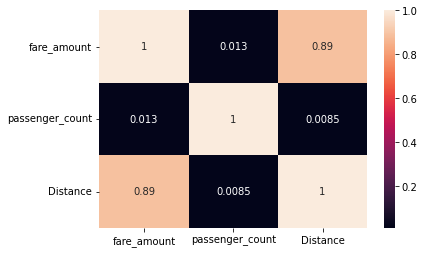

In [15]:
corr_mat = df[['fare_amount', 'passenger_count', 'Distance']].corr()
sns.heatmap(corr_mat, annot=True)

By plotting the correlation matrix, we can spot low correlation between the 2 features `passenger_count` and `Distance`.

`Distance` and `fare_amount`, on the other hand, have high correlation. We can examine a new feature called `avg_per_km` by dividing the `fare_amount` for the `Distance`.

In [16]:
df['avg_per_km'] = df['fare_amount'] / df['Distance']

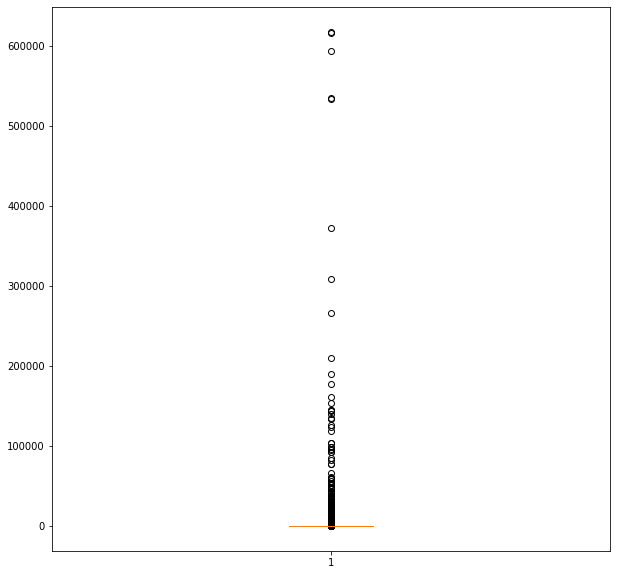

In [17]:
plt.figure(figsize=(10,10))
plt.boxplot(df['avg_per_km']);

We can spot trips with abnormally high average price per km. Let's gradually filter these out.

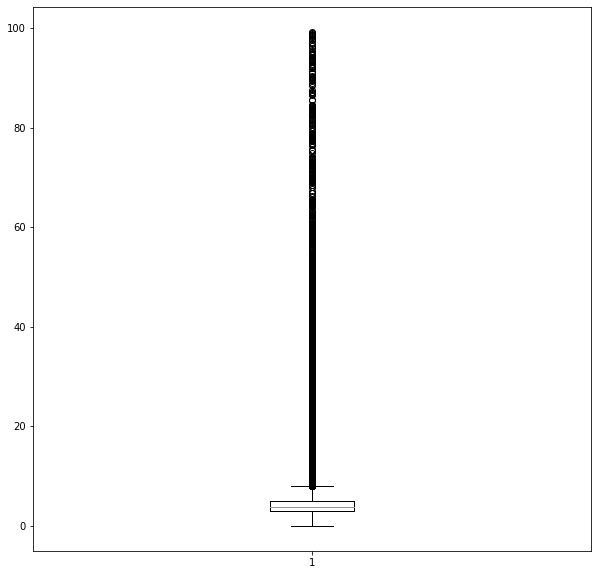

In [18]:
df = df[df['avg_per_km'] < 100]
plt.figure(figsize=(10,10))
plt.boxplot(df['avg_per_km']);

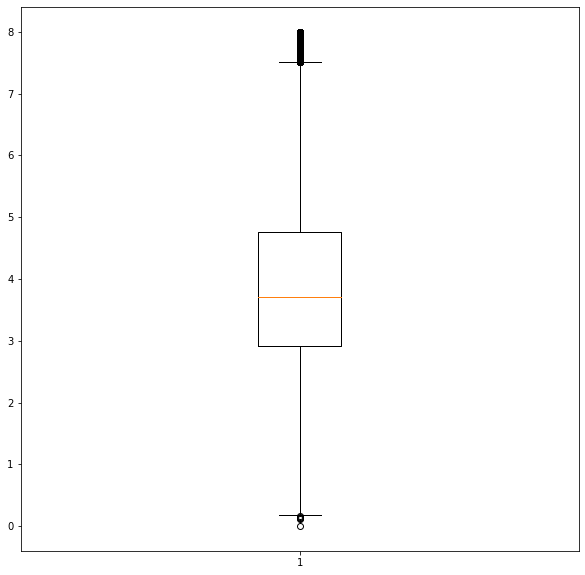

In [19]:
df = df[df['avg_per_km'] < 8]
plt.figure(figsize=(10,10))
plt.boxplot(df['avg_per_km']);

In [20]:
df['avg_per_km'].mean(), df['avg_per_km'].median()

(3.955889221208938, 3.7126842677598786)

The difference between mean and median is not large (less than $0.5/km), this is acceptable threshold.

# Correlation between Distance and Average Price

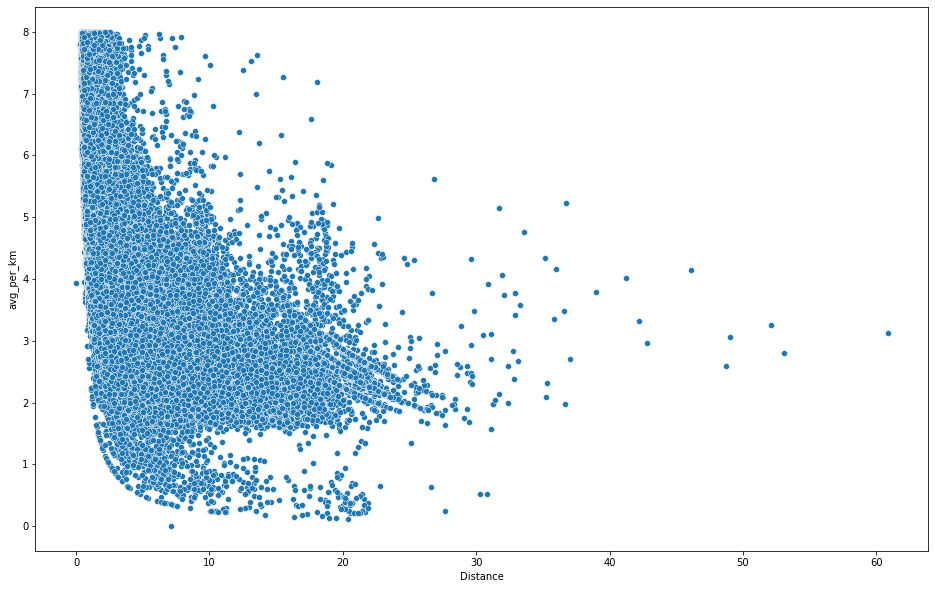

In [21]:
plt.subplots(figsize=(16,10))
sns.scatterplot(data=df, x='Distance', y='avg_per_km');

We can see a down-trend from the distribution of the data. Let's find the Pearson correlation between the 2 features.

<AxesSubplot:>

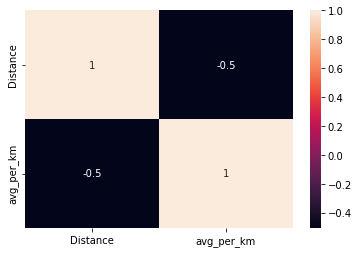

In [22]:
corr_mat = df[['Distance', 'avg_per_km']].corr()
sns.heatmap(corr_mat, annot=True)

There is a negative correlation between the 2 features. It can be explained that the average price will reduce after some certain kilometer threshold (normally seen in transportation service).

# Coordinates analyse

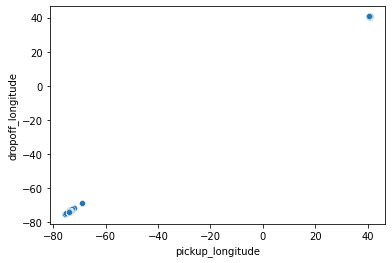

In [23]:
sns.scatterplot(data=df, x='pickup_longitude', y='dropoff_longitude');

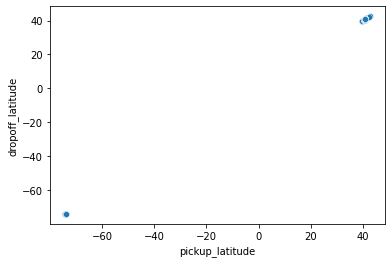

In [24]:
sns.scatterplot(data=df, x='pickup_latitude', y='dropoff_latitude');

Most trips took place at around (long = -70, lat = 40). However a minor amount of trips are at around (long = 40, lat = -70).

In [25]:
df.loc[(df['pickup_latitude'] > 30) & (df['pickup_longitude'] < -60), 'Location'] = 'Group 1'
df.loc[(df['pickup_latitude'] < 30) & (df['pickup_longitude'] > -60), 'Location'] = 'Group 2'
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,avg_per_km,Location
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,4.455474,Group 1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,3.133151,Group 1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2.561365,Group 1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,3.189536,Group 1
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,3.575060,Group 1


# Date and Time features extract

In [26]:
df['pickup_datetime'].dtype

dtype('O')

Let's convert it to datetime.

In [27]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime'].head()

24238194   2015-05-07 19:52:06+00:00
27835199   2009-07-17 20:04:56+00:00
44984355   2009-08-24 21:45:00+00:00
25894730   2009-06-26 08:22:21+00:00
17610152   2014-08-28 17:47:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

We can extract more detail time features to help analysing the data.

In [28]:
df['week_day'] = df['pickup_datetime'].dt.day_name()
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Hour'] = df['pickup_datetime'].dt.hour
date_df = df.drop(['key', 'pickup_datetime'], axis=1, errors='ignore')
date_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,avg_per_km,Location,week_day,Year,Month,Hour
24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,4.455474,Group 1,Thursday,2015,5,19
27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,3.133151,Group 1,Friday,2009,7,20
44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2.561365,Group 1,Monday,2009,8,21
25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,3.189536,Group 1,Friday,2009,6,8
17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,3.575060,Group 1,Thursday,2014,8,17


# Analyze time features

## By year

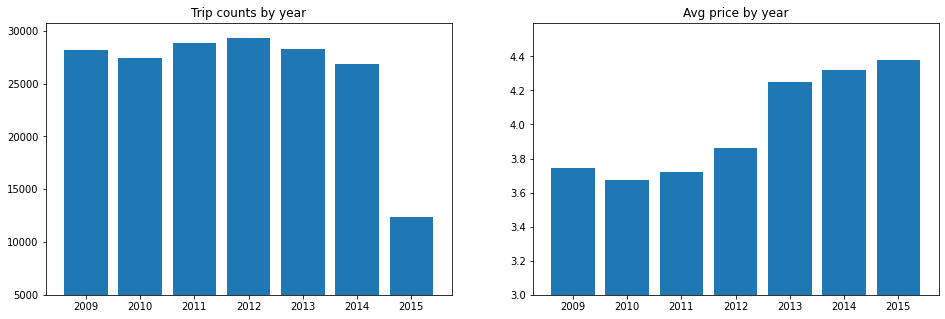

In [29]:
from copy import deepcopy

temp = deepcopy(date_df)

temp['foo'] = np.zeros(temp.shape[0])
groupby_year = temp.groupby('Year')
count_by_year = groupby_year['foo'].count()
avg_by_year = groupby_year['avg_per_km'].mean()

fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].bar(count_by_year.index, count_by_year)
ax[0].set_title('Trip counts by year')
ax[0].set_ylim(5000)

ax[1].bar(avg_by_year.index, avg_by_year)
ax[1].set_title('Avg price by year');
ax[1].set_ylim(3);

The data in 2015 is not fully collected, which makes it hard to conclude about the trend of uber users throughout time. However, it is shown the that average price gradually increase after years.

## By month

First, let's omit data in year 2015 as the mentioned reason above.

In [30]:
temp = temp[temp['Year'] < 2015]

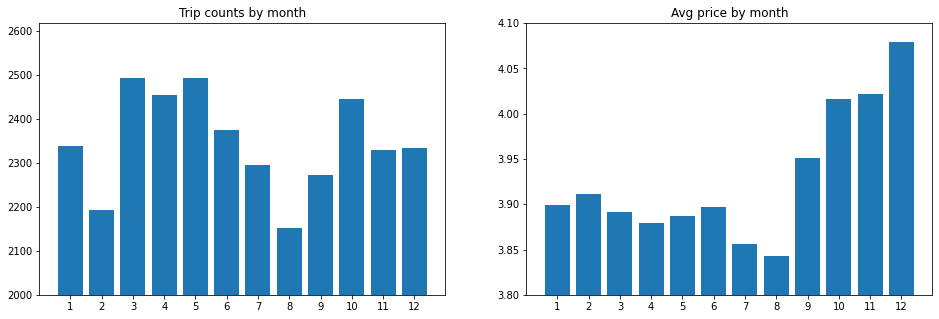

In [31]:

groupby_month = temp.groupby(['Month', 'Year'])
count_by_month = groupby_month['foo'].count().groupby('Month').mean()
avg_by_month = groupby_month['avg_per_km'].mean().groupby('Month').mean()
fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].bar(count_by_month.index, count_by_month)
ax[0].set_xticks([i for i in range(1, 13)])
ax[0].set_title('Trip counts by month')
ax[0].set_ylim(2000)

ax[1].bar(avg_by_month.index, avg_by_month)
ax[1].set_xticks([i for i in range(1, 13)])
ax[1].set_title('Avg price by month')
ax[1].set_ylim(3.8, 4.1);

Looks like more people tend to use Uber for travel in Summer and Winter vacations.

The average price is moderate in the first 6 months of the year, bottoms in August, but then increases considerably afterward and peaks in December.

# By week day

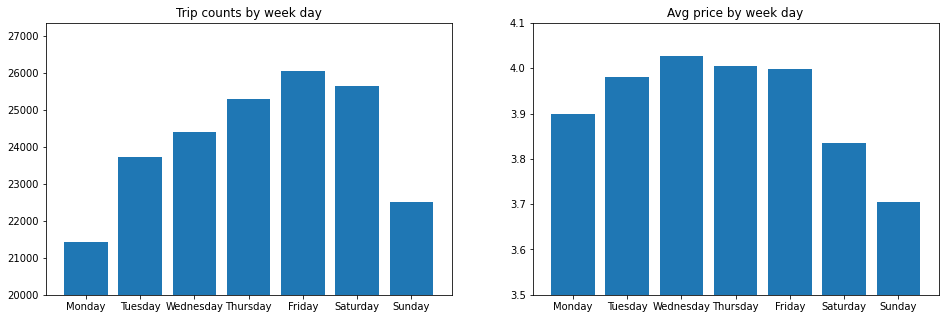

In [32]:
week_days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

groupby_day = temp.groupby(['week_day'])
count_by_day = groupby_day['foo'].count().reindex(week_days)
avg_by_day = groupby_day['avg_per_km'].mean().reindex(week_days)
fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].bar(count_by_day.index, count_by_day)
ax[0].set_title('Trip counts by week day')
ax[0].set_ylim(20000)

ax[1].bar(avg_by_day.index, avg_by_day)
ax[1].set_title('Avg price by week day');
ax[1].set_ylim(3.5, 4.1);

The demand of Uber trip shows a trend of a gentle mountain where it peaks on Friday and is low on Monday and Sunday.

The average price, however, is high on working days and low in the weekend.

## By hour

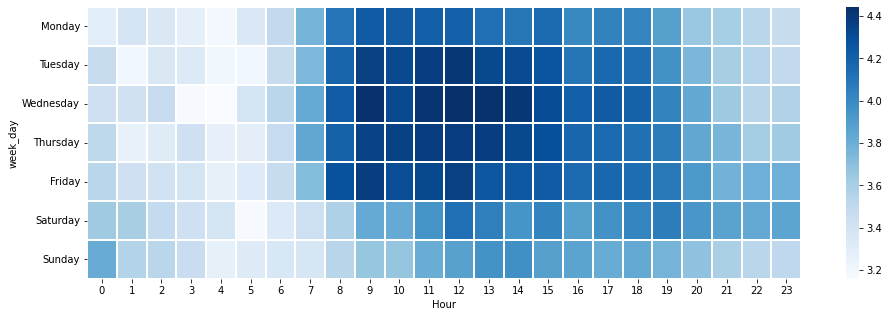

In [33]:
avg_by_hour = temp.groupby(['Hour', 'week_day'])['avg_per_km'].mean()
avg_by_hour = avg_by_hour.unstack(level=0).reindex(week_days)

plt.figure(figsize=(16,5))
sns.heatmap(avg_by_hour, cmap="Blues",
           linewidth=0.3);

Different in cost of 4 time bags:
- 0AM - 7AM: low cost
- 8AM - 3PM: high cost
- 4PM - 7PM: medium cost
- 8PM - 0AM: low cost

# Create group for categorical time

In [34]:
temp = deepcopy(date_df)

def feature_day(x):
    if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 'Workday'
    else:
        return 'Weekend'

def feature_time(x):
    if 0 < x < 7:
        return 'early_morning'
    if x < 15:
        return 'morning_and_afternoon'
    if x < 19:
        return 'evening'
    return 'night'
    
    
date_df['week_day'] = temp['week_day'].apply(feature_day)
date_df['Hour'] = temp['Hour'].apply(feature_time)

# Linear Regression with Statmodels

In [35]:
onehot_df = pd.get_dummies(date_df[['passenger_count', 'Distance',
                                    'Month', 'Hour', 'Year',
                                   'week_day', 'fare_amount', 'Location']], columns=['week_day', 'Hour', 'Location'])

def z_score_norm(s):
    return (s - s.mean()) / s.std()
    
to_norm = ['passenger_count', 'Distance']
for col in to_norm:
    onehot_df[col] = z_score_norm(onehot_df[col])

onehot_df.head()

,passenger_count,Distance,Month,Year,fare_amount,week_day_Weekend,week_day_Workday,Hour_early_morning,Hour_evening,Hour_morning_and_afternoon,Hour_night,Location_Group 1,Location_Group 2
24238194,-0.527724,-0.504969,5,2015,7.5,0,1,0,0,0,1,1,0
27835199,-0.527724,-0.292642,7,2009,7.7,0,1,0,0,0,1,1,0
44984355,-0.527724,0.414540,8,2009,12.9,0,1,0,0,0,1,1,0
25894730,1.008064,-0.510903,6,2009,5.3,0,1,0,0,1,0,1,0
17610152,2.543852,0.260717,8,2014,16.0,0,1,0,1,0,0,1,0


In [36]:
import statsmodels.api as sm

X = onehot_df.loc[:, ~onehot_df.columns.isin(['fare_amount'])]
X = sm.add_constant(X)

y = onehot_df['fare_amount']
model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 1.319e+05
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:40:57   Log-Likelihood:            -4.8193e+05
No. Observations:              181392   AIC:                         9.639e+05
Df Residuals:                  181382   BIC:                         9.640e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -474.5407      3.926   -120.862      0.000    -482.236    -466.845
passenger_count                0.0595      0.008      7.341      0.000       0.044       0.075
Distance                       8.7495      0.008   1076.313      0.000       8.734       8.765
Month                          0.0643      0.002     27.130      0.000       0.060       0.069
Year                           0.5365      0.004    122.258      0.000       0.528       0.545
week_day_Weekend            -237.4527      1.963   -120.947      0.000    -241.301    -233.605
week_day_Workday            -237.0879      1.963   -120.775      0.000    -240.935    -233.240
Hour_early_morning          -119.5154      0.982   -121.729      0.000    -121.440    -117.591
Hour_evening                -117.9996      0.982   -120.223      0.000    -119.923    -116.076
Hour_morning_and_afternoon  -118.1268      0.982   -120.334      0.000    -120.051    -116.203
Hour_night                  -118.8989      0.982   -121.100      0.000    -120.823    -116.975
Location_Group 1            -237.9930      1.966   -121.047      0.000    -241.847    -234.139
Location_Group 2            -236.5476      1.980   -119.466      0.000    -240.428    -232.667
==============================================================================
Omnibus:                   113404.810   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20481326.212
Skew:                           1.981   Prob(JB):                         0.00
Kurtosis:                      54.906   Cond. No.                     2.85e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.01e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

All the features used in the model has p-value = 0, mean they have statistical significance.

# Some Regression Models with Sklearn

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [39]:
def fit_and_predict(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r_squared = model.score(X_test, y_test)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    print('R-squared: ', r_squared)
    print('RMSE: ', RMSE)
    compare_distribution(y_test, y_pred)
    
def compare_distribution(y_test, y_pred):
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))

    ax[0].hist(y_test, bins=100)
    ax[0].set_title('Actual distribution of fare_amount')
    ax[1].hist(y_pred, bins=100)
    ax[1].set_title('Predicted distribution of fare_amount');

## Linear Regression

R-squared:  0.8731387594891445
RMSE:  3.399678830064826


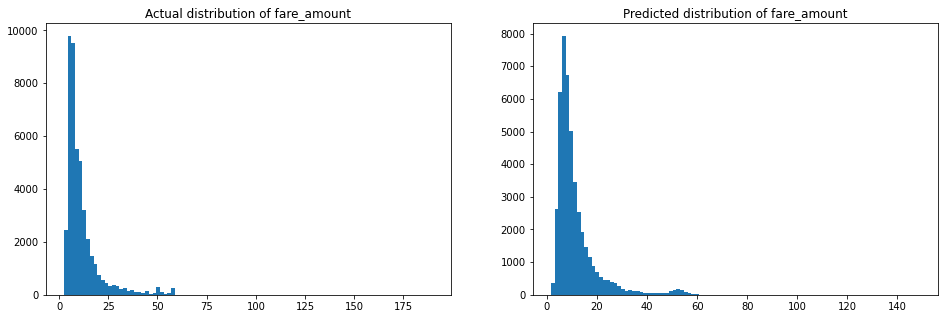

In [40]:
from sklearn.linear_model import LinearRegression

OLS = LinearRegression()
    
fit_and_predict(OLS)

## K-Neighbors Regression

R-squared:  0.8753386943656266
RMSE:  3.370072543822502


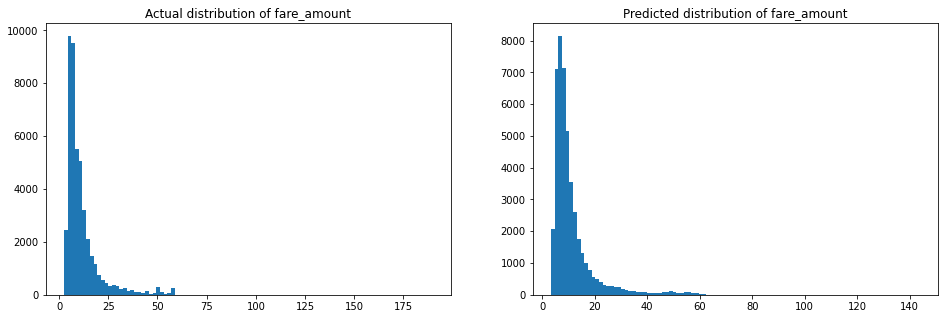

In [41]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=10)

fit_and_predict(KNN)

## Decision Tree Regressor

R-squared:  0.8827792421922177
RMSE:  3.267952055450572


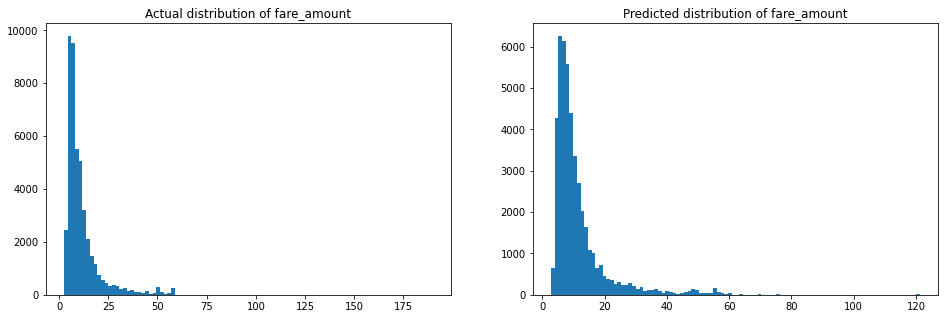

In [42]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth=50, min_samples_leaf=25)

fit_and_predict(DTR)

# Conclusion

After trying different (yet simple) regression models with some hyperparameters, Decision Tree offers lowest RMSE and highest R-squared. However these scores are not ideal yet. Overall, our predicted fare price achieved a similar distribution to the actual target data.

If I have more time on this task, I may perform clustering for the coordinates to extract better features. I tried reverse engineer to get the real location of each datapoints but it consumed a lot of time and did not finish. Before I desicded to create the `Location` feature based on coordinates feature, the RMSE of Decision Tree was 2.91 (better than current model). Therefore I believe if we do feature engineering more carefully we can explain how different pickup or dropoff location might affect fare price.

About the dataset, I think some of the "abnormal trips" were because they were product delivery (Uber express). That might explain some trips carry heavy products may have high cost despite low distance. However, we don't have enough data to do more analysis on this.